In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import re
import math
plt.gray()
fnames = !ls /Users/nakatani/labo/grabcut/img/foreground_fixed
print(len(fnames))
!pwd

1
/Users/nakatani/labo/grabcut/samples/python


In [3]:
def show(img):
    plt.figure(figsize = (20,20))
    plt.imshow(img), plt.show()
    

In [9]:
mask = '../../img/patch3/mask/'
boundary = '../../img/boundary/'
foreground = '../../img/foreground_fixed/'

In [10]:
img = cv2.imread(mask + '0_0.png')

In [18]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, 1, 255, cv2.THRESH_BINARY)

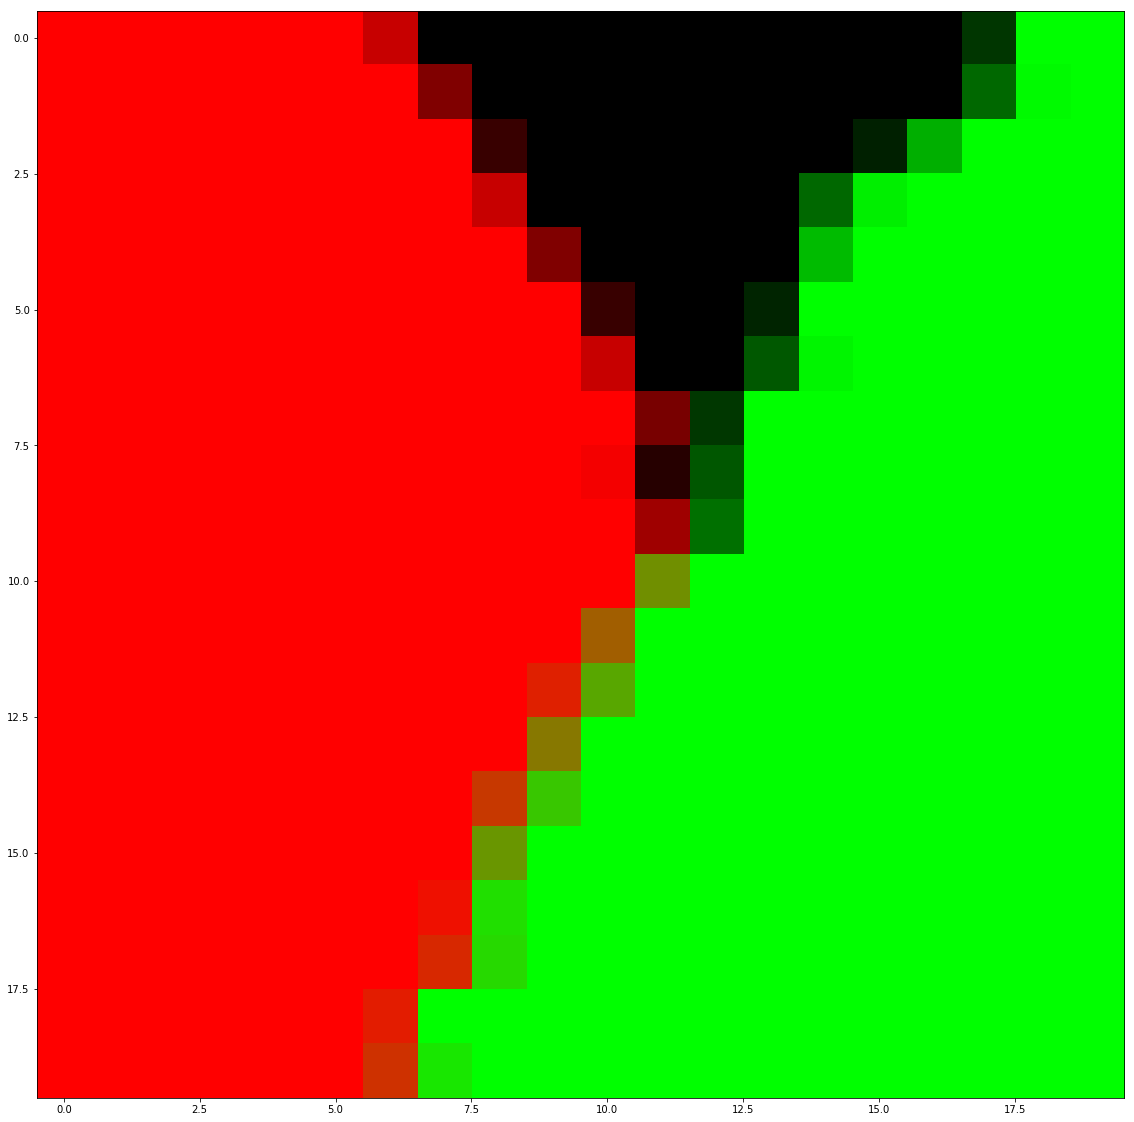

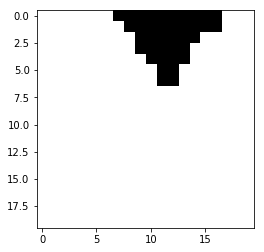

(<matplotlib.image.AxesImage at 0x7fe8707fccf8>, None)

In [19]:
plt.figure(figsize = (20,20))
plt.imshow(img), plt.show()
plt.imshow(thresh), plt.show()


In [ ]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (20,20))

plt.imshow(img_gray), plt.show()

In [ ]:
img_b = img[:,:,0]
img_g = img[:,:,1]
img_r = img[:,:,2]

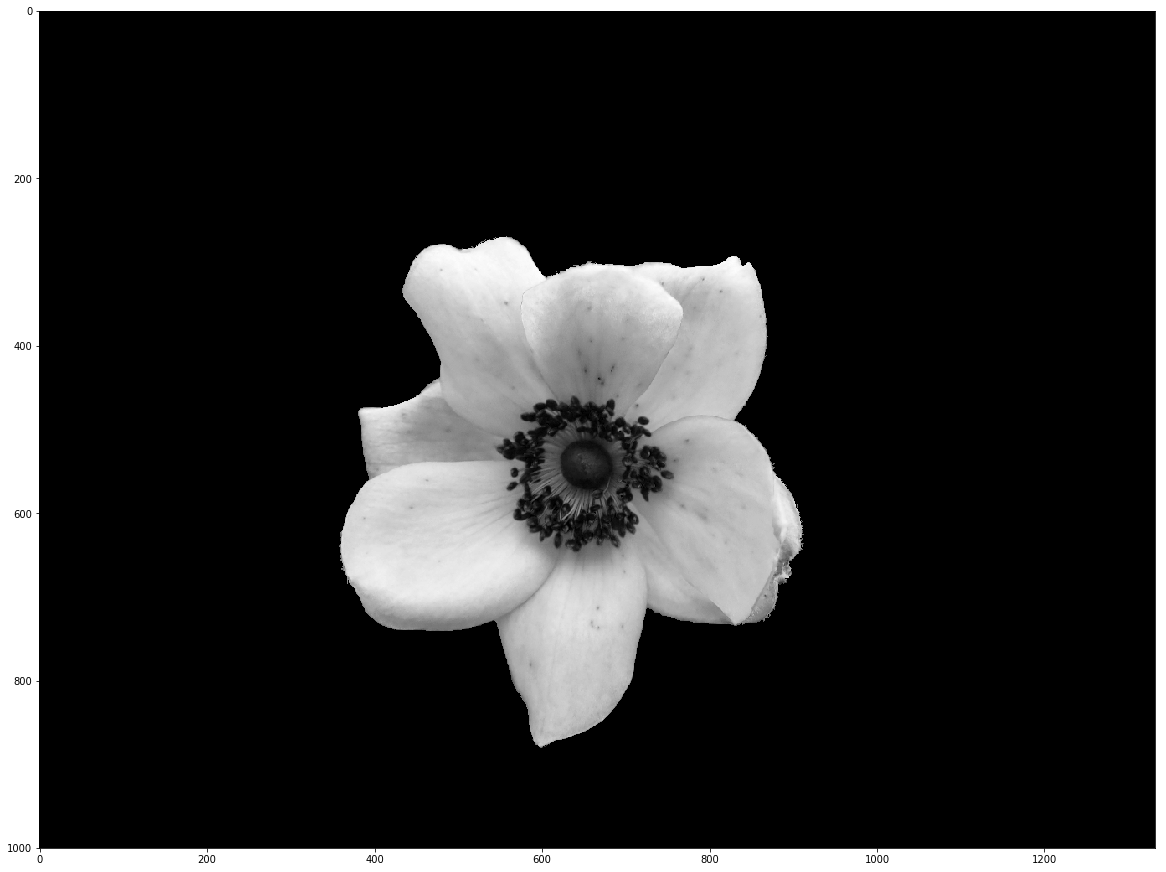

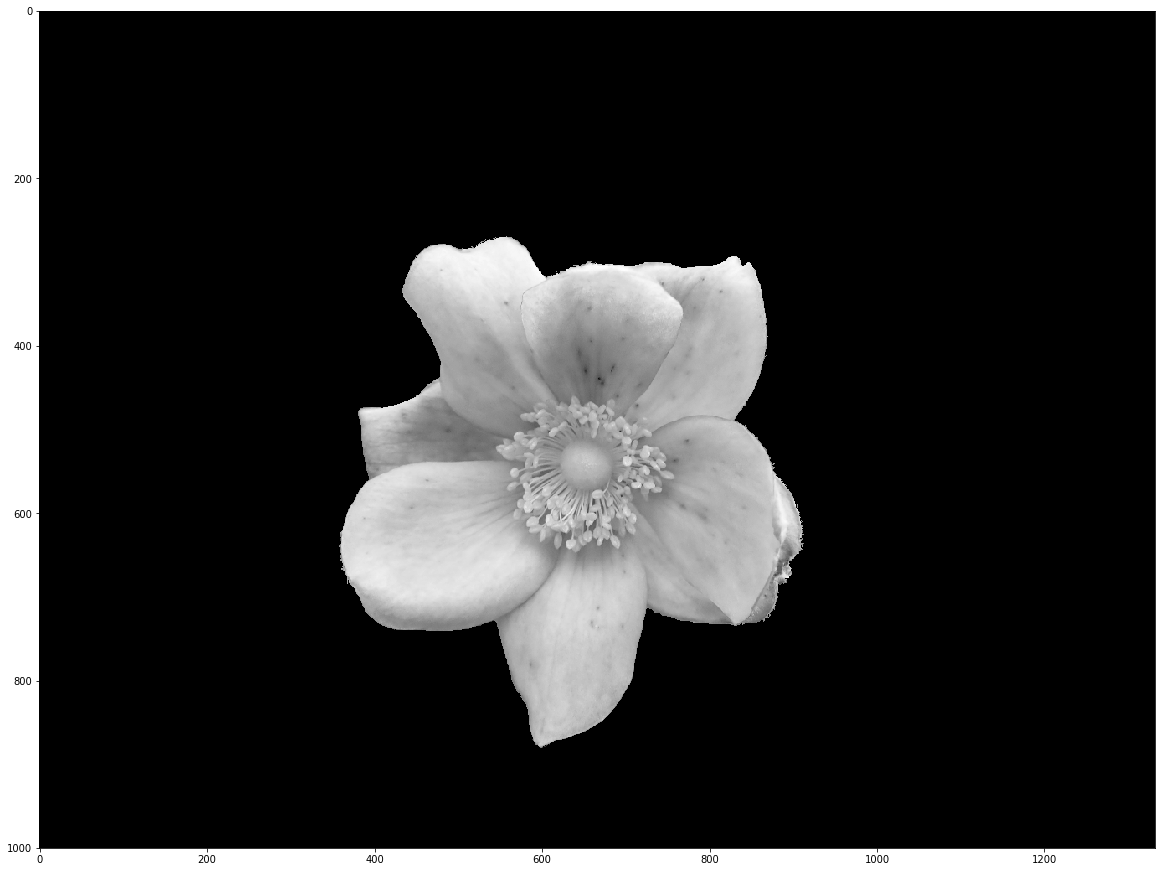

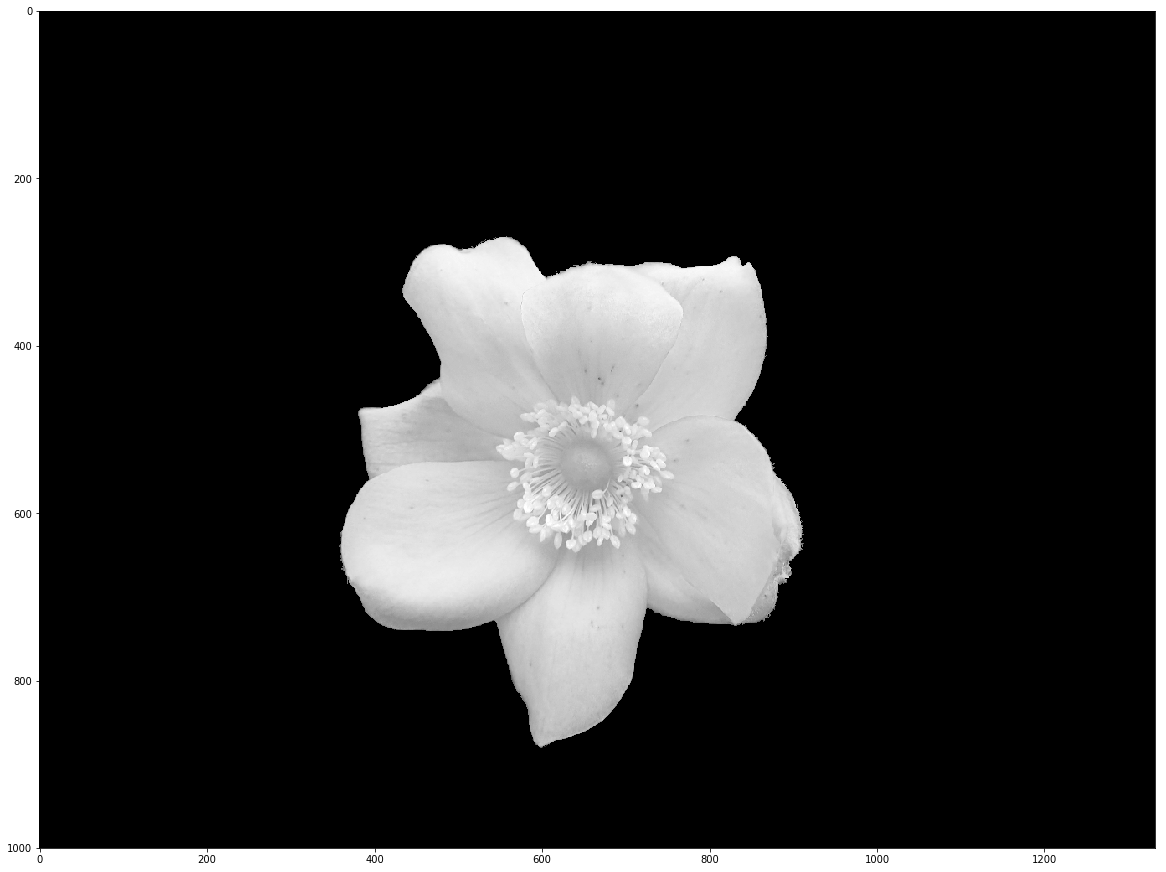

In [69]:
show(img_b)
show(img_g)
show(img_r)

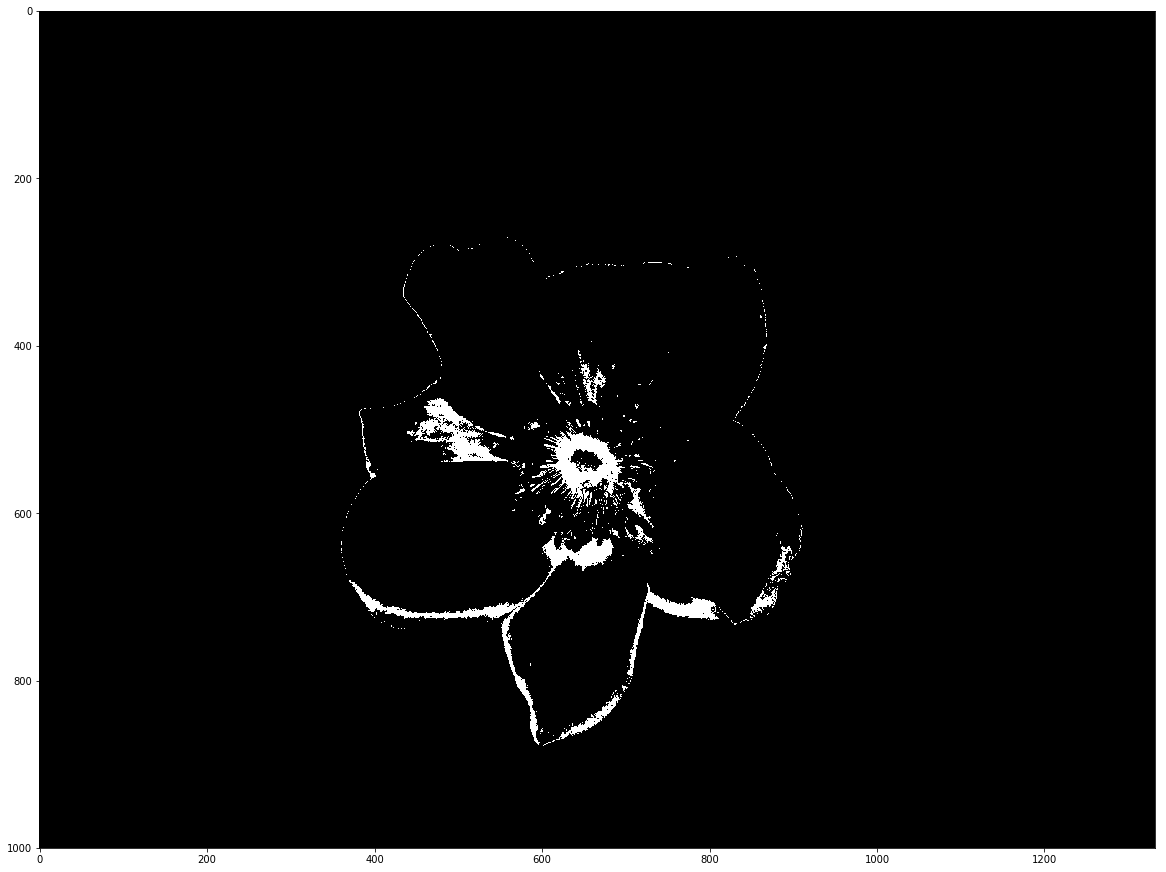

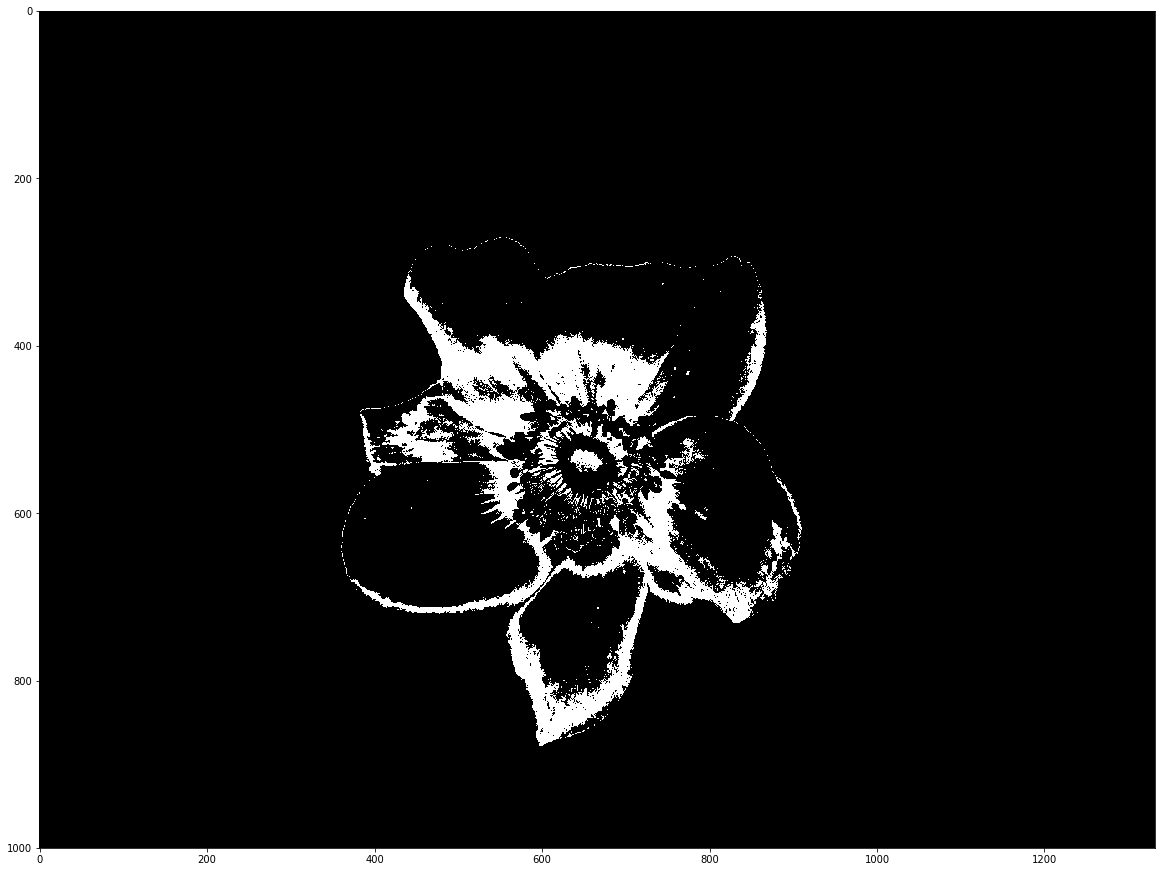

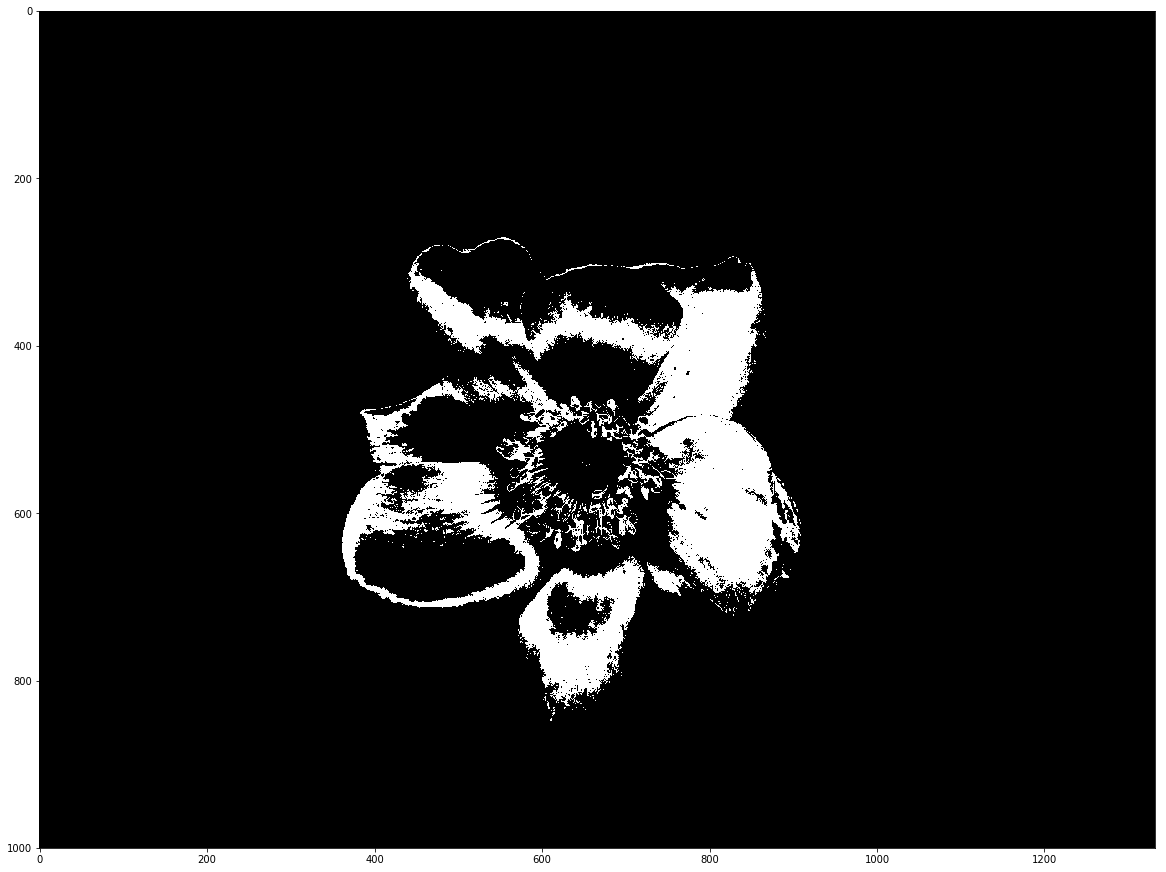

In [70]:
for i in range(3):
    _, thresh1 = cv2.threshold(img_r, 160+i*20, 255, cv2.THRESH_BINARY)
    _, thresh2 = cv2.threshold(img_r, 180+i*20, 255, cv2.THRESH_BINARY)
    xor = cv2.bitwise_xor(thresh1, thresh2)
    show(xor)
# for i in range(2):
#     _, thresh1 = cv2.threshold(img_b, 160+i*20, 255, cv2.THRESH_BINARY)
#     _, thresh2 = cv2.threshold(img_b, 180+i*20, 255, cv2.THRESH_BINARY)
#     xor = cv2.bitwise_xor(thresh1, thresh2)
#     show(xor)

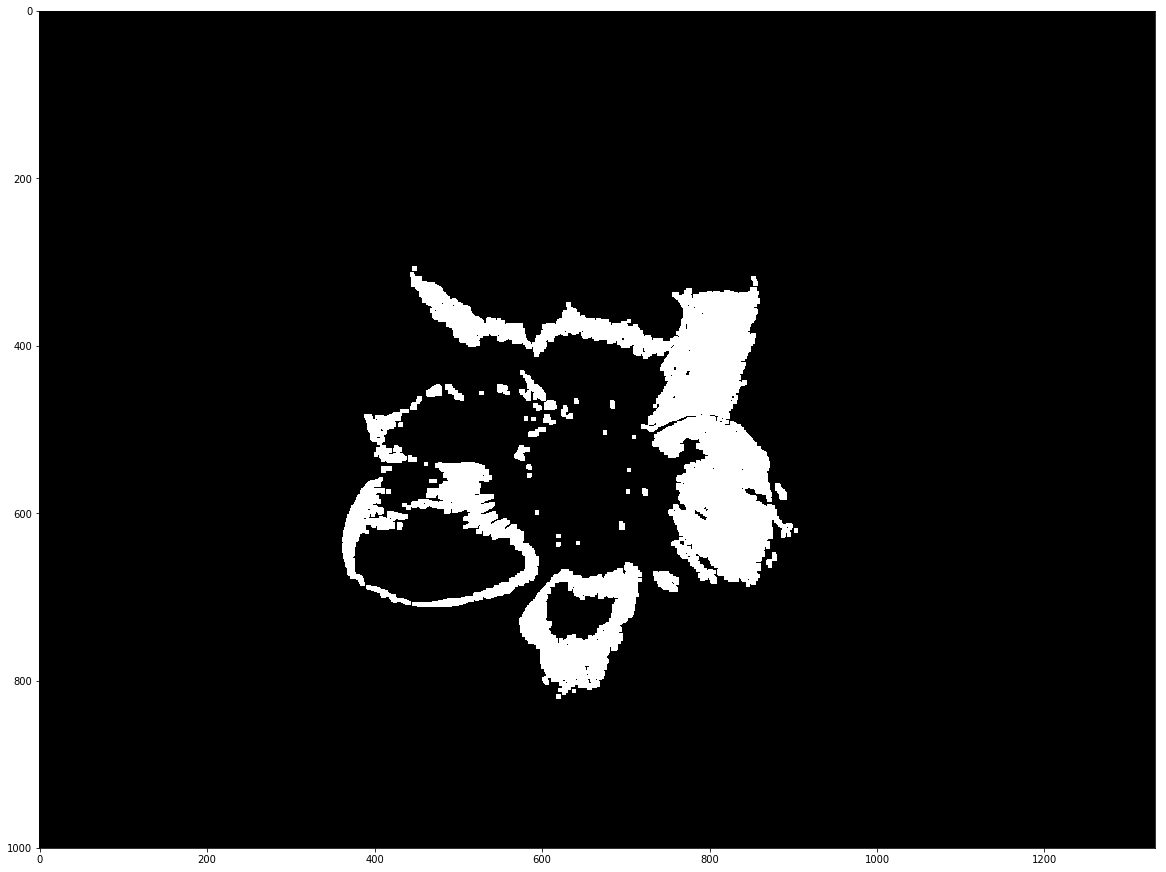

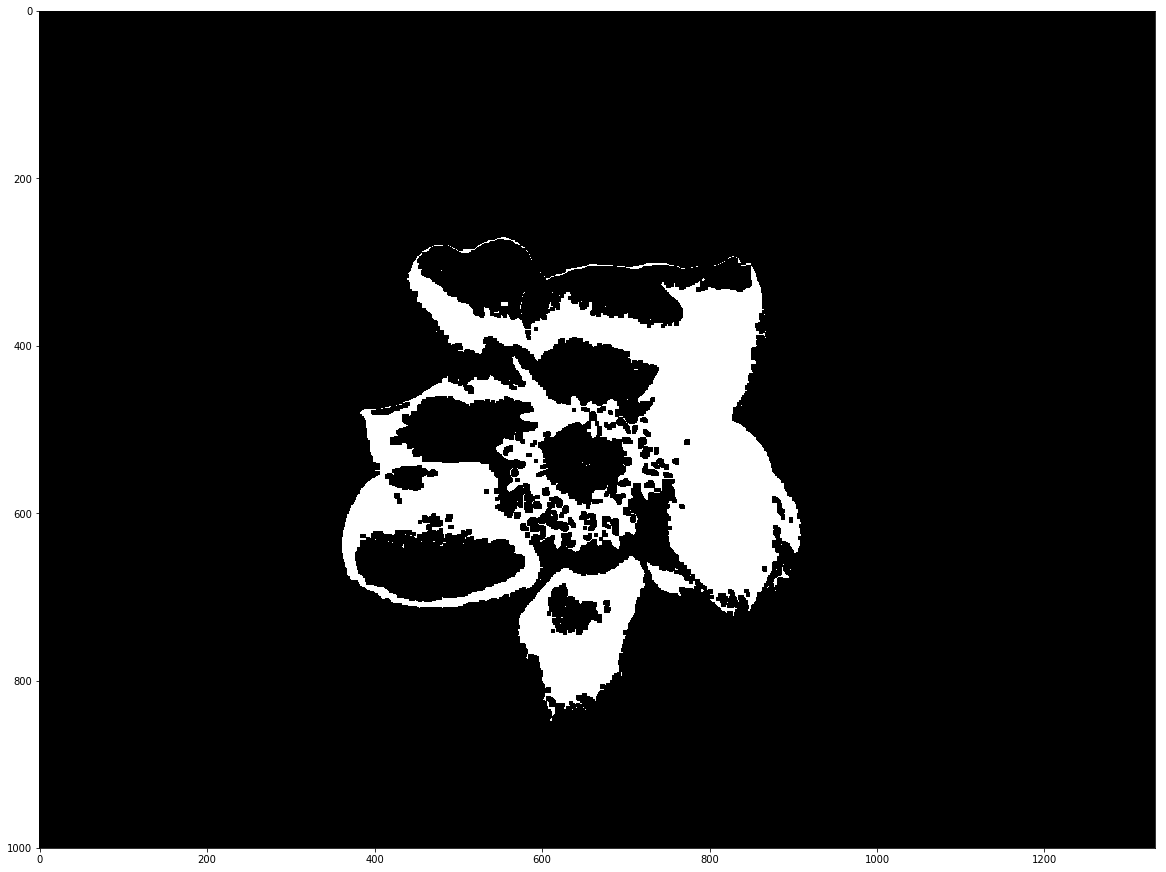

In [71]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(xor, cv2.MORPH_OPEN, kernel)
show(opening)
closing = cv2.morphologyEx(xor, cv2.MORPH_CLOSE, kernel)
show(closing)

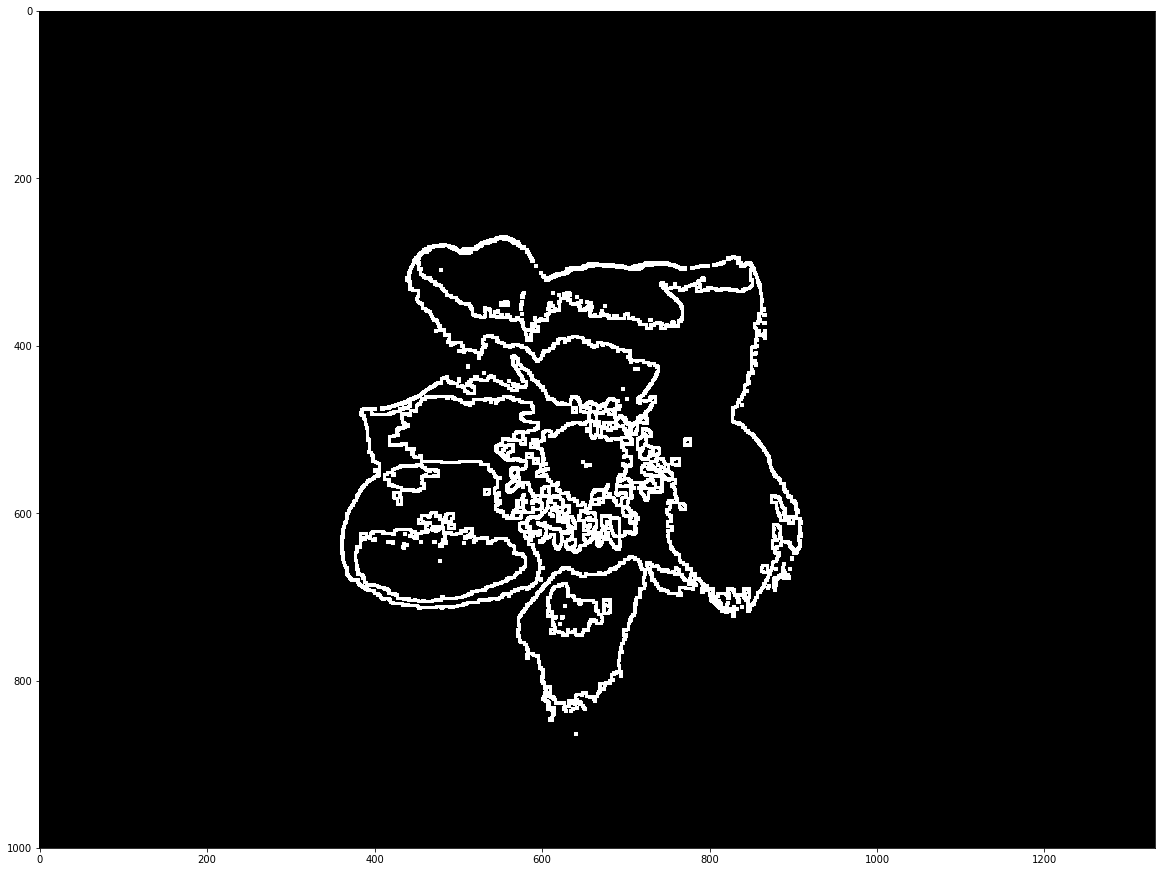

In [72]:
gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)
show(gradient)

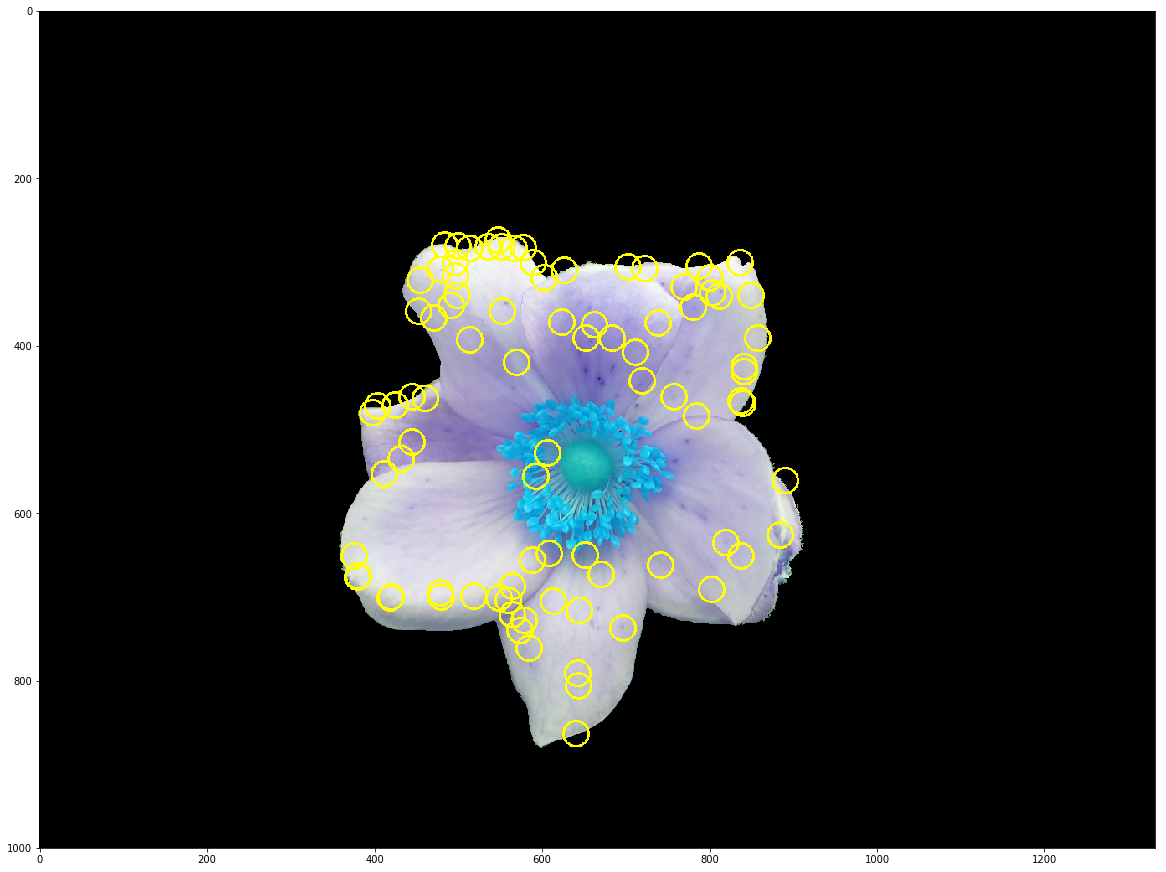

In [107]:
coord = Harris(xor, 0.0001)
for j in range(len(coord[0])):
    
    gcopy= cv2.circle(img, (coord[1][j],coord[0][j]), 15, [255,255,0],2)
show(gcopy)

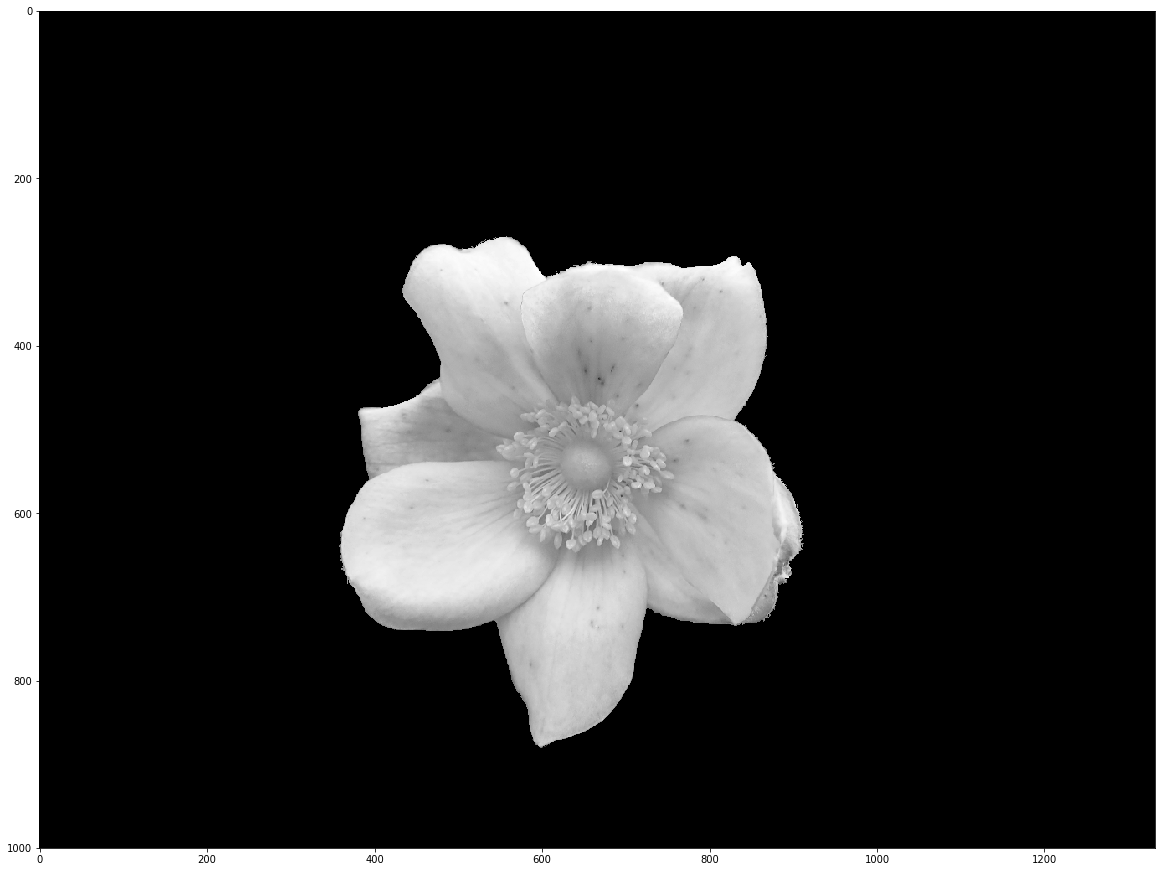

In [73]:
show(img_gray)

In [124]:
img = cv2.imread(foreground + '100.png')

In [12]:
def Harris(mask_img, thresh_value):
    
#     thresh_value = 0.02
    
#     gray = cv2.cvtColor(mask_img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(mask_img)
    dst = cv2.cornerHarris(gray,5,5,0.1)
    dst = cv2.dilate(dst,None)
#     ret, dst = cv2.threshold(dst, dst.max() * thresh_value, 255, cv2.THRESH_BINARY)
    dst = np.uint8(dst)
    _, __, ___, centroids = cv2.connectedComponentsWithStats(dst)
    res = np.int64(centroids)
#     print(res) 
#     mask_img[res[1:,1],res[1:,0]]=[0,0,255]
    coord = res[1:, :].T
    coord = coord[::-1]
#     print(coord) 
    
    return(coord)

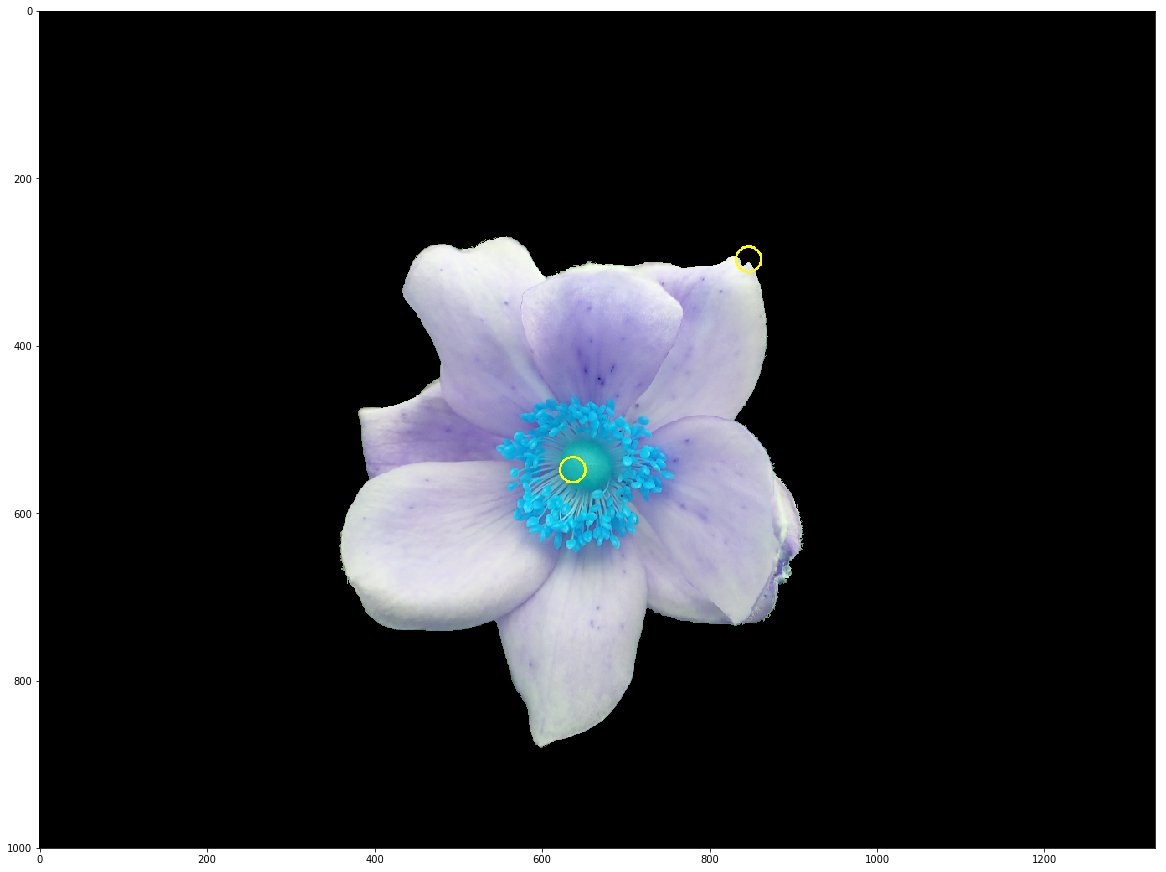

In [13]:
coord = Harris(img_gray, 0.0001)
for j in range(len(coord[0])):
    
    img = cv2.circle(img, (coord[1][j],coord[0][j]), 15, [255,255,0],2)
show(img)

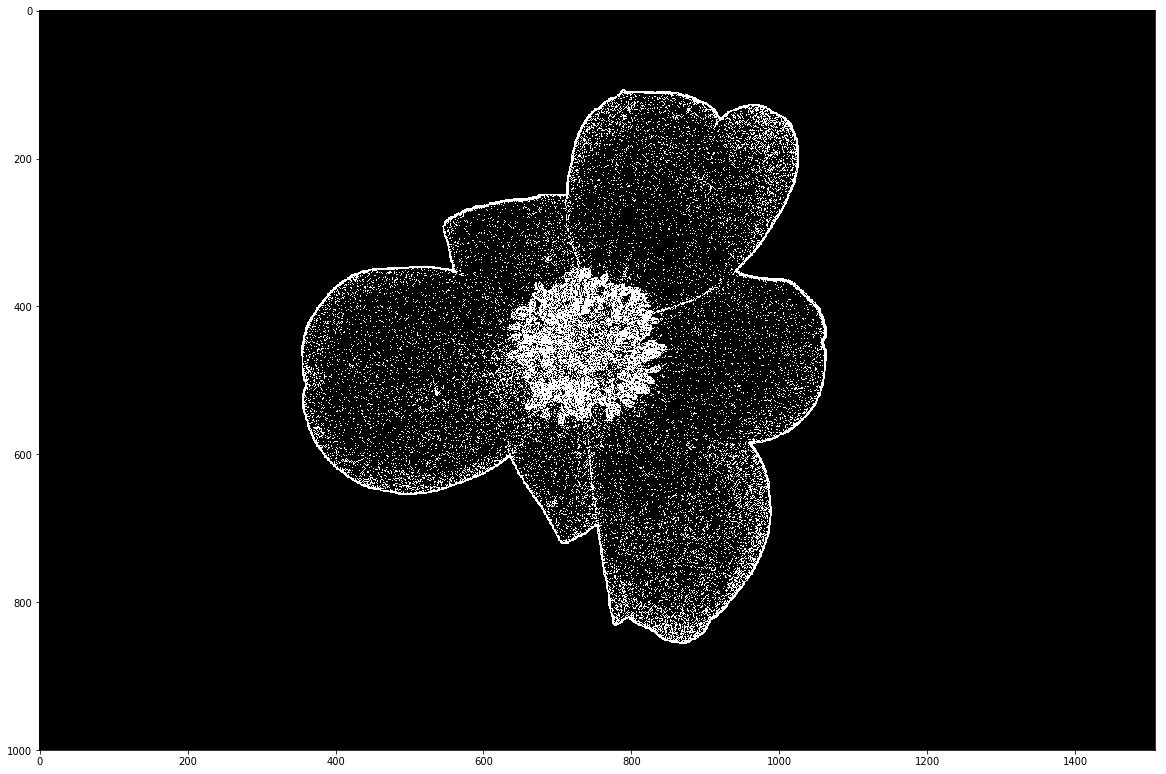

True

In [30]:
fname = '104.png'
img = cv2.imread(foreground + fname)
# img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray = img[:,:,1]
# kernel1 = np.ones((3,3),np.float32)/9
# dst = cv2.filter2D(img_gray,-1,kernel)

# _, img_gray = cv2.threshold(img_gray, 1, 255, cv2.THRESH_BINARY)
# _, dst = cv2.threshold(dst, 1, 255, cv2.THRESH_BINARY)


# kernel2 = np.ones((5,5),np.uint8)
# img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel2)
# dst = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel2)

# xor = cv2.bitwise_xor(img_gray, dst)
# show(xor)

### thre = int(img_gray.max() / 11)

laplacian = cv2.Laplacian(img_gray,cv2.CV_64F,ksize=3)
laplacian = np.absolute(laplacian)
laplacian_8u = np.uint8(laplacian)

# laplacian = cv2.Laplacian(laplacian,cv2.CV_64F)
# plt.imshow(laplacian, cmap = 'gray'), plt.show()
# _, dst = cv2.threshold(laplacian_8u, 8, 255, cv2.THRESH_BINARY)
# dst = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)
kernel = np.ones((3,3),np.float32)
kernel3 = np.ones((3,3),np.float32)/9
kernel5 = np.ones((5,5),np.float32)/25
kernel7 = np.ones((7,7),np.float32)/49

# dst = cv2.filter2D(laplacian,-1,kernel7)
# _, dst = cv2.threshold(laplacian, 32, 255, cv2.THRESH_BINARY)
dst = cv2.filter2D(laplacian,-1,kernel5)
_, dst = cv2.threshold(laplacian, 21, 255, cv2.THRESH_BINARY)
show(dst)
# dst = cv2.filter2D(laplacian,-1,kernel3)
# _, dst = cv2.threshold(laplacian, 44, 255, cv2.THRESH_BINARY)
# show(dst)
# dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)
# show(dst)
# dst = Zhang_Suen_thinning(dst)

cv2.imwrite('./img/' + fname, dst)

In [310]:
img_gray.max() / 8

31.875

In [296]:
kernel[1][0]

1.0

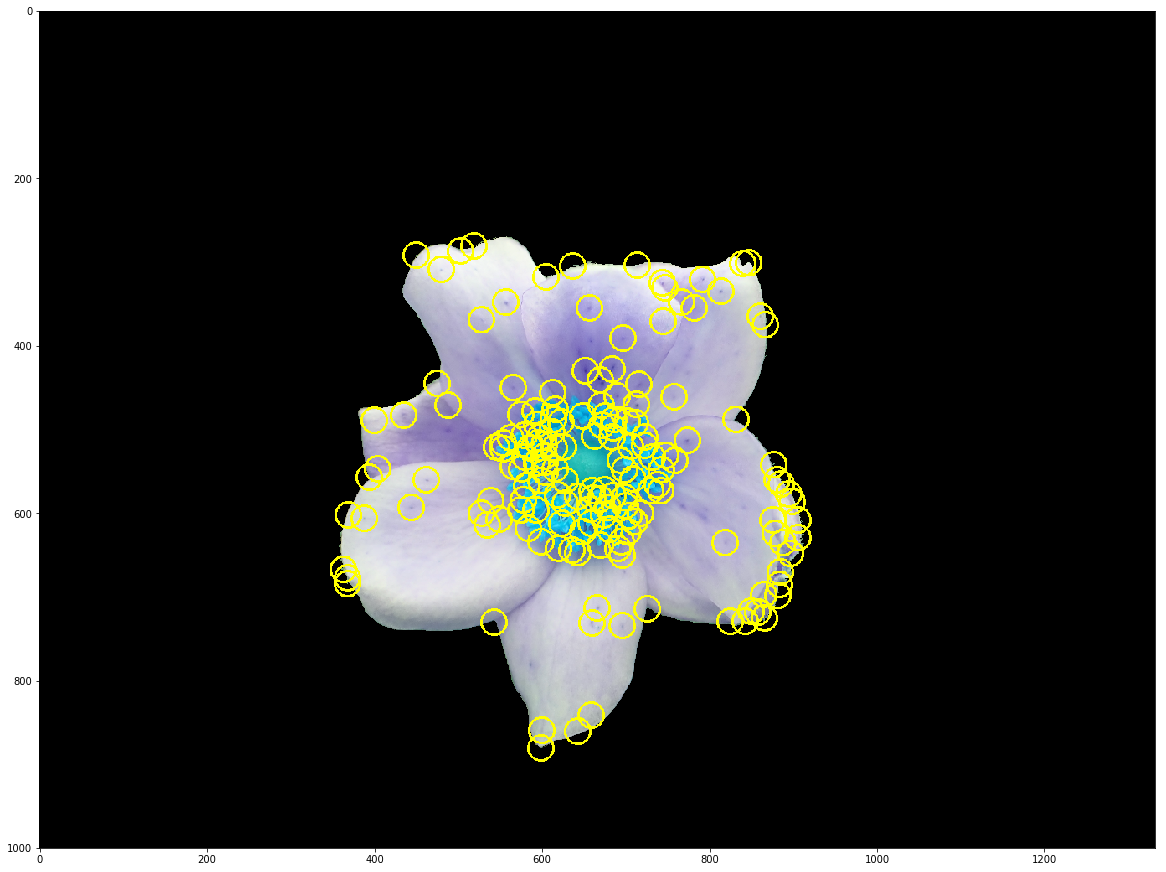

In [297]:
coord = Harris(dst, 0.1)
for j in range(len(coord[0])):
    
    imgc = cv2.circle(img, (coord[1][j],coord[0][j]), 15, [255,255,0],2)
show(imgc)


In [112]:
coord.shape

(2, 57)

In [5]:
img = cv2.imread(foreground + '100.png')
# img = cv2.imread(foreground + '100.png').astype(np.float32)


In [139]:
img = img*(-1)

In [142]:
img -= 5

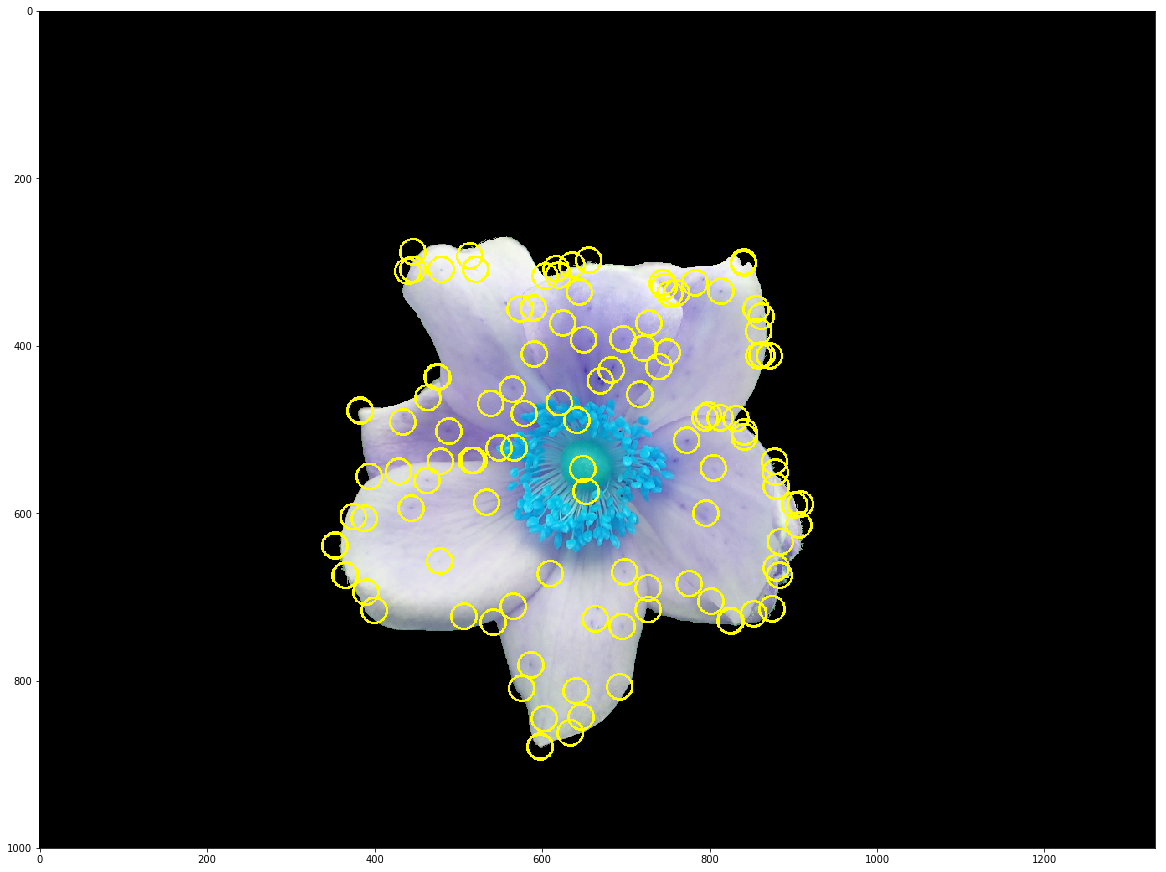

In [193]:
show(img)

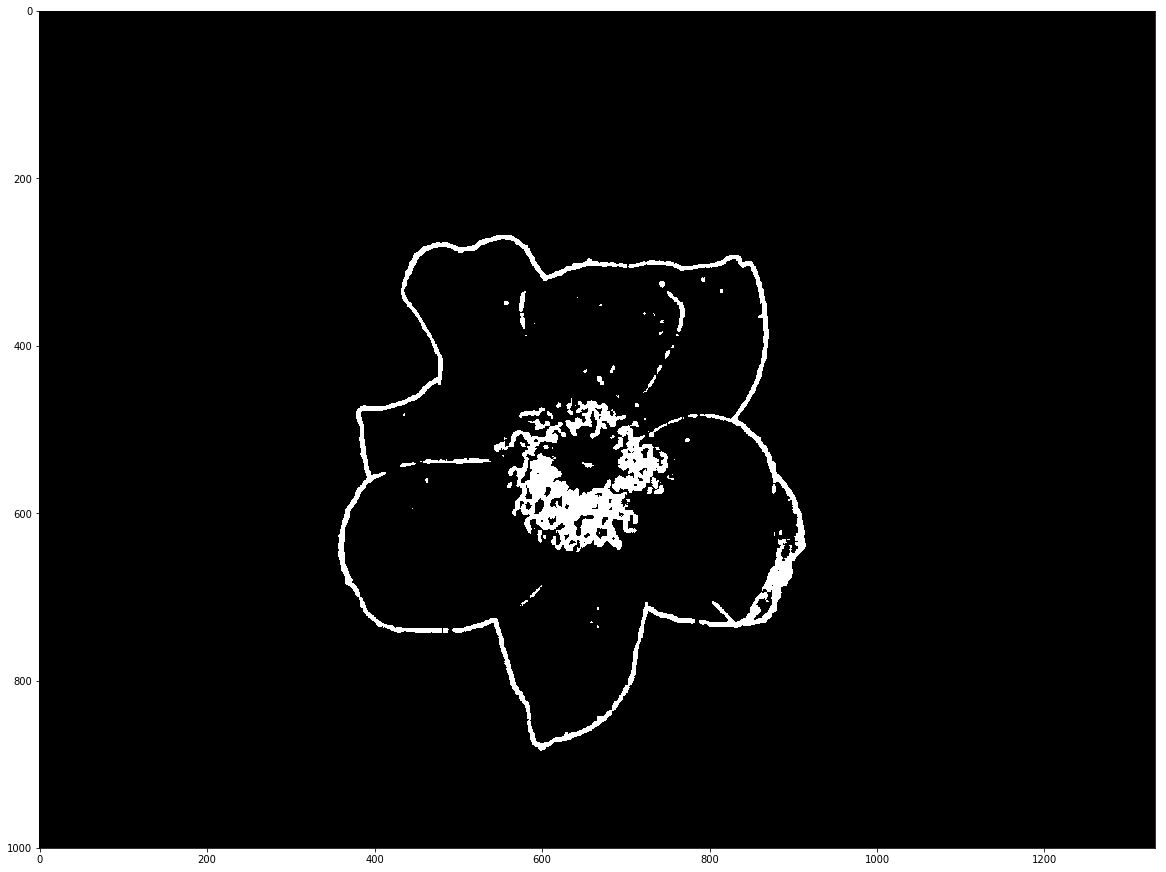

In [9]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(img_gray,cv2.CV_64F,ksize=3)
laplacian = np.absolute(laplacian)
laplacian_8u = np.uint8(laplacian)

# laplacian = cv2.Laplacian(laplacian,cv2.CV_64F)

dst = cv2.filter2D(laplacian_8u,-1,kernel5)

_, dst1 = cv2.threshold(dst, 32, 255, cv2.THRESH_BINARY)
_, dst2 = cv2.threshold(dst, 12, 255, cv2.THRESH_BINARY)

show(dst1)

# grayをHarrisに渡す

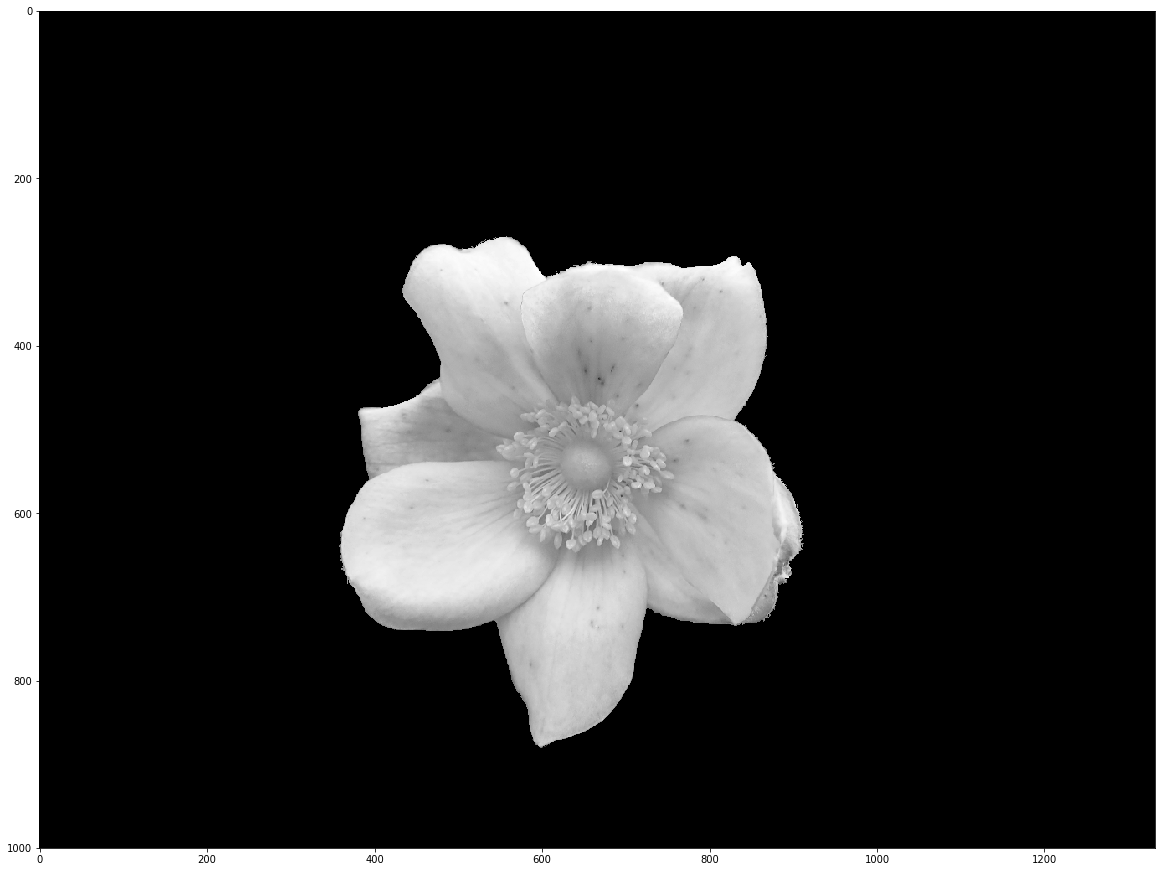

In [14]:
show(img_gray)

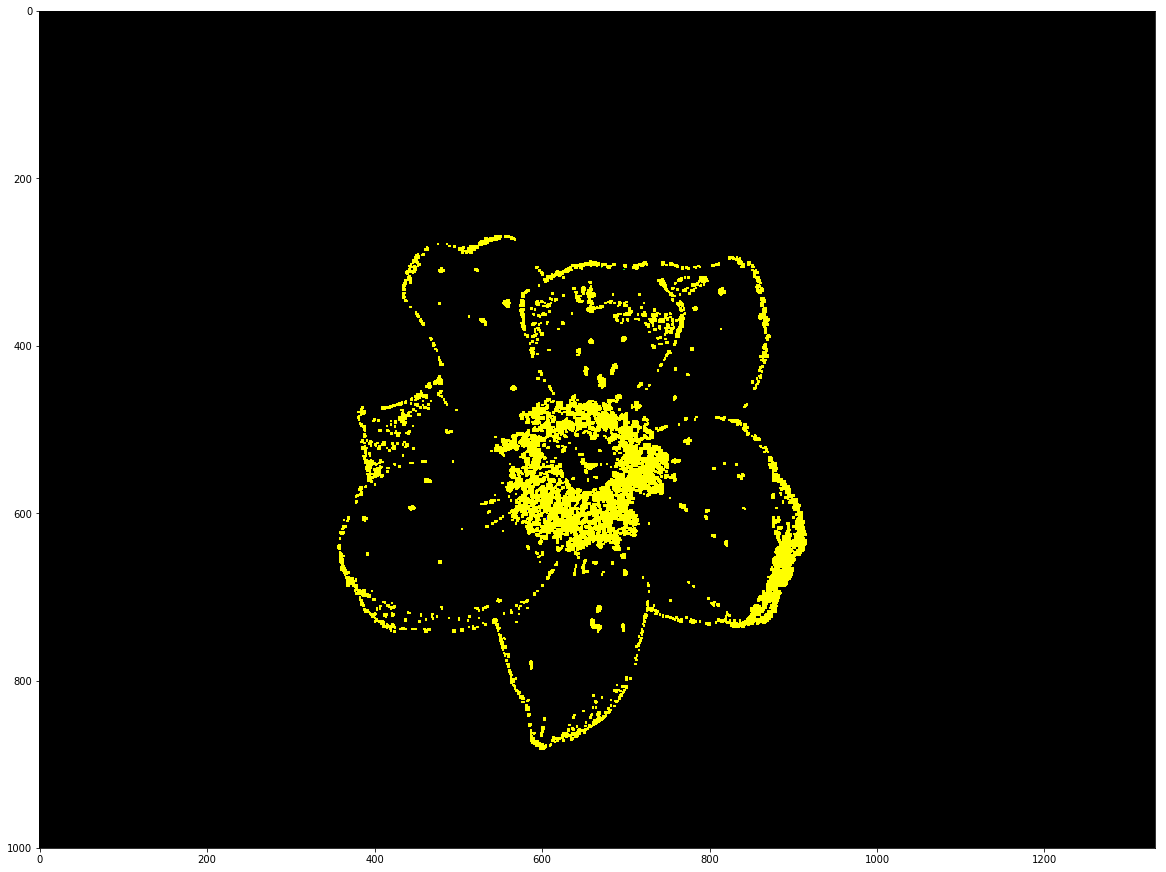

In [59]:
img = cv2.imread(foreground + '100.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(img_gray)
dst = cv2.cornerHarris(gray,2,3,0.03)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.000001*dst.max()]=[255,255,255]
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

blank = np.zeros(img.shape, np.uint8)

blank[img == 255] = 255

img = cv2.imread(foreground + '100.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(img_gray)
dst = cv2.cornerHarris(gray,2,3,0.03)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.000001*dst.max()]=[255,255,0]
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

blank = np.zeros(img.shape, np.uint8)

blank[img == 255] = 255

show(blank)

In [60]:


# cv2.imwrite('./img/img.png', img)
cv2.imwrite('./img/coner.png', blank)


True

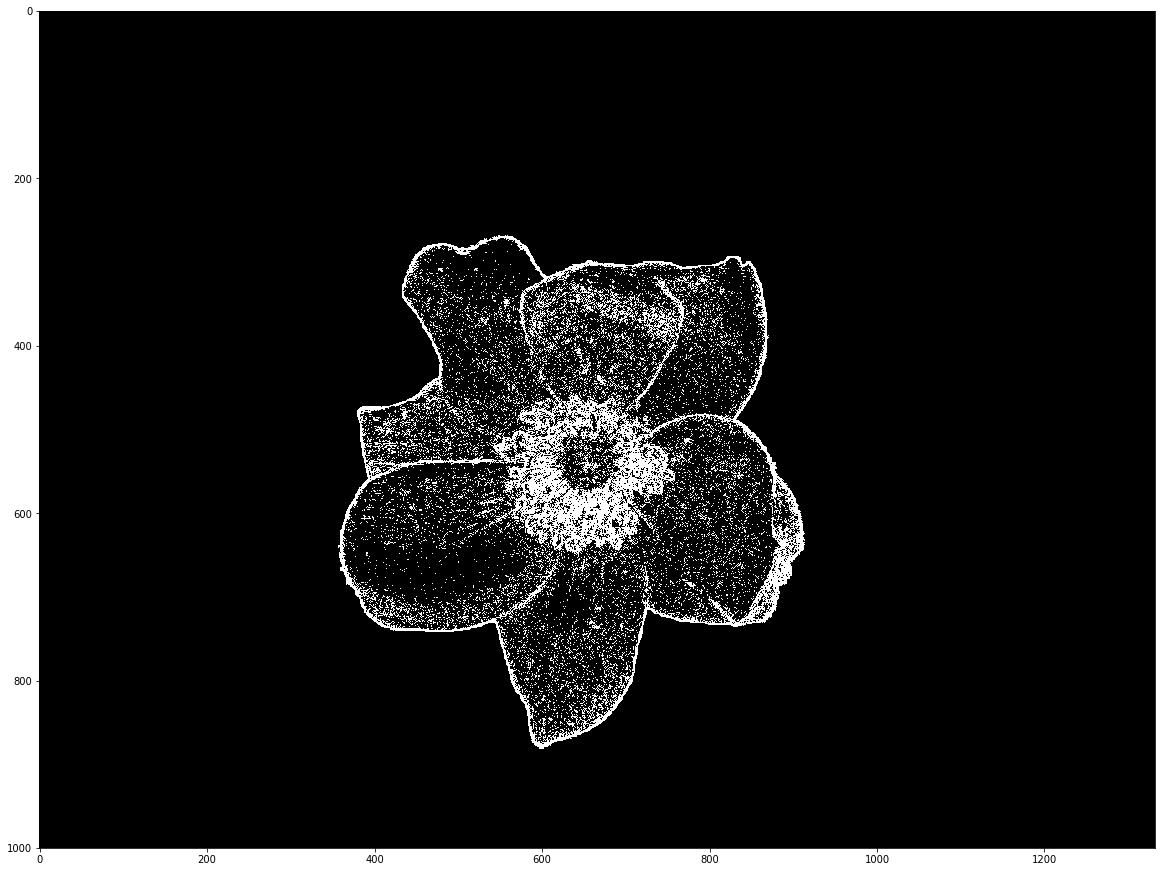

In [63]:
show(dst)

In [7]:
kernel5 = np.ones((5,5),np.float32)/25
kernel7 = np.ones((7,7),np.float32)/49

# dst = cv2.filter2D(laplacian,-1,kernel7)
# _, dst = cv2.threshold(laplacian, 32, 255, cv2.THRESH_BINARY)
dst = cv2.filter2D(dst,-1,kernel5)
show(dst)
dst = cv2.filter2D(dst,-1,kernel5)
show(dst)

NameError: name 'dst' is not defined

0


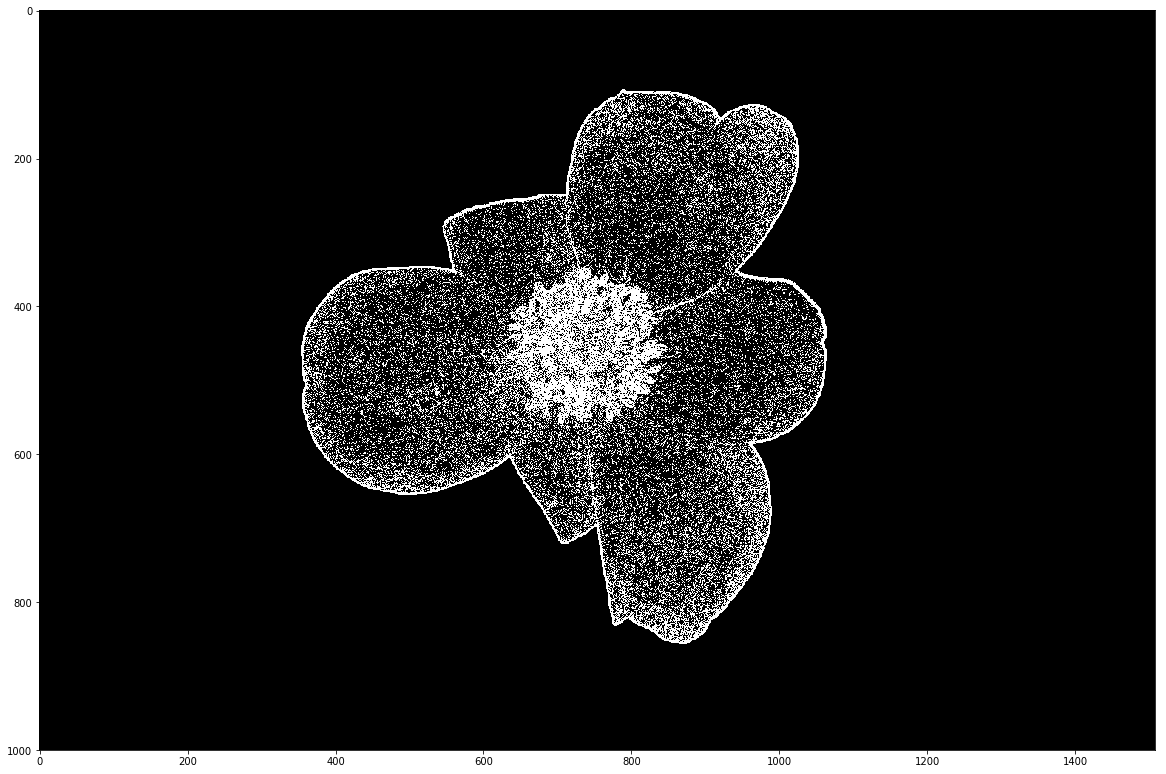

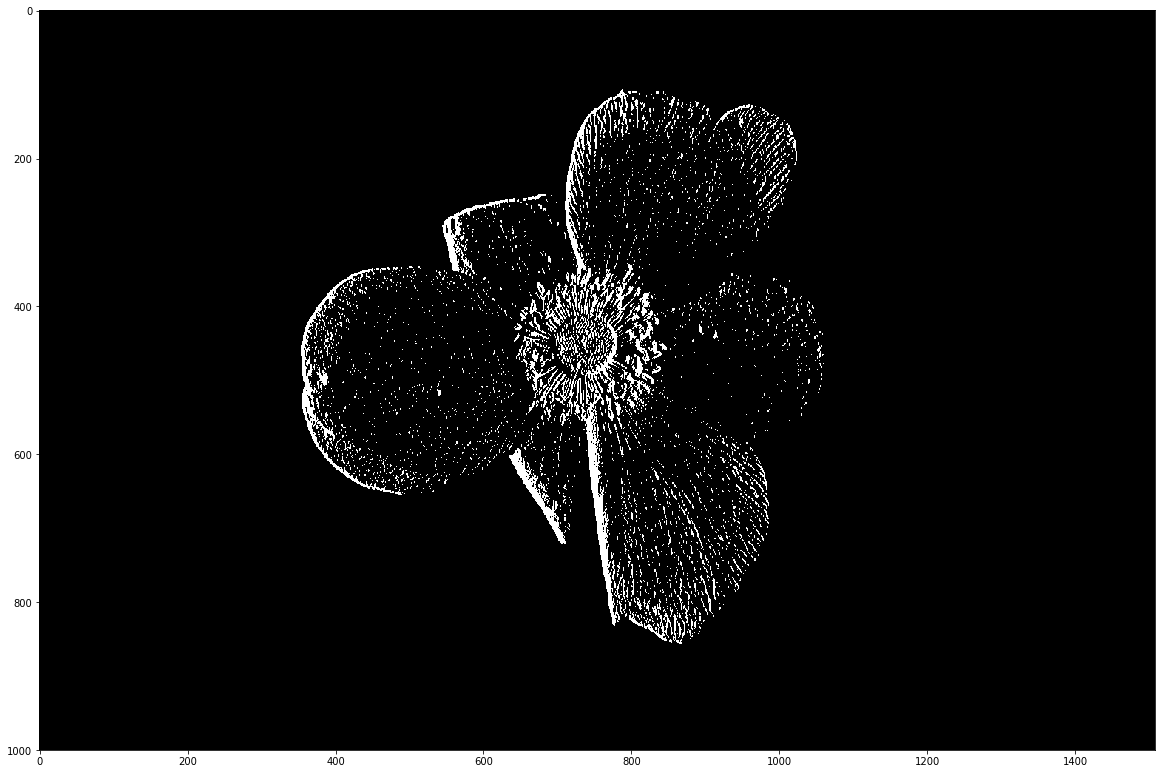

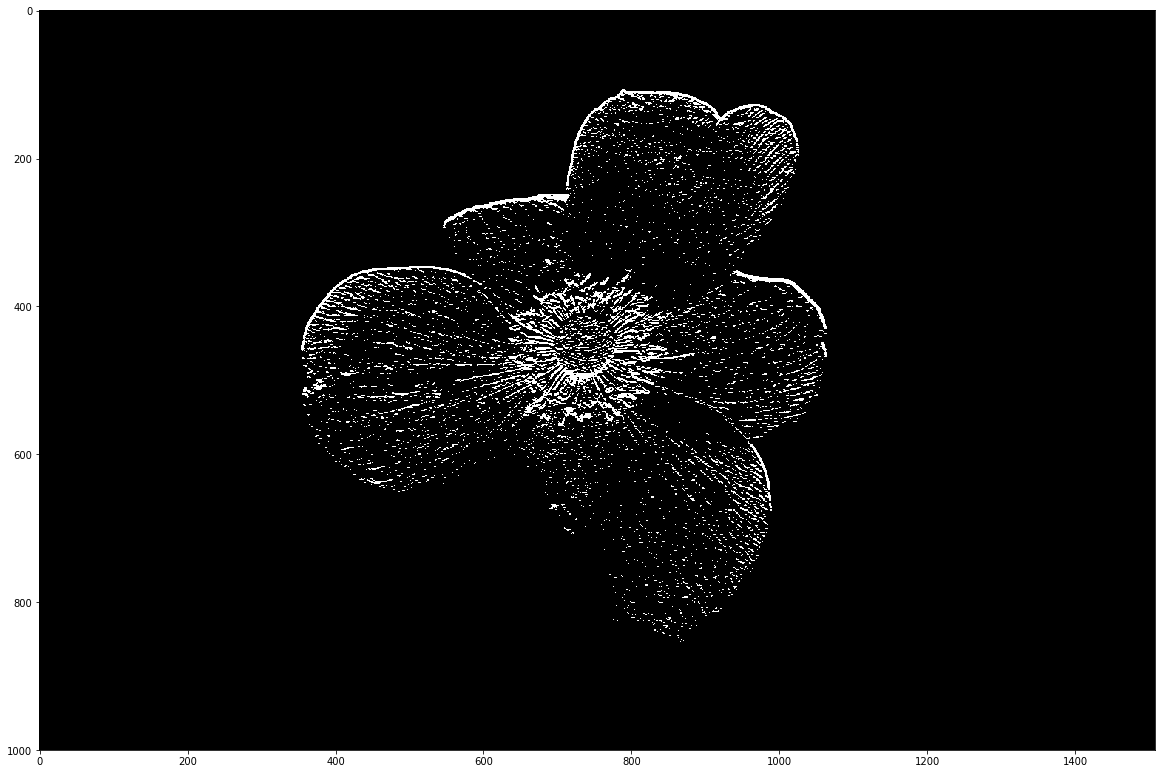

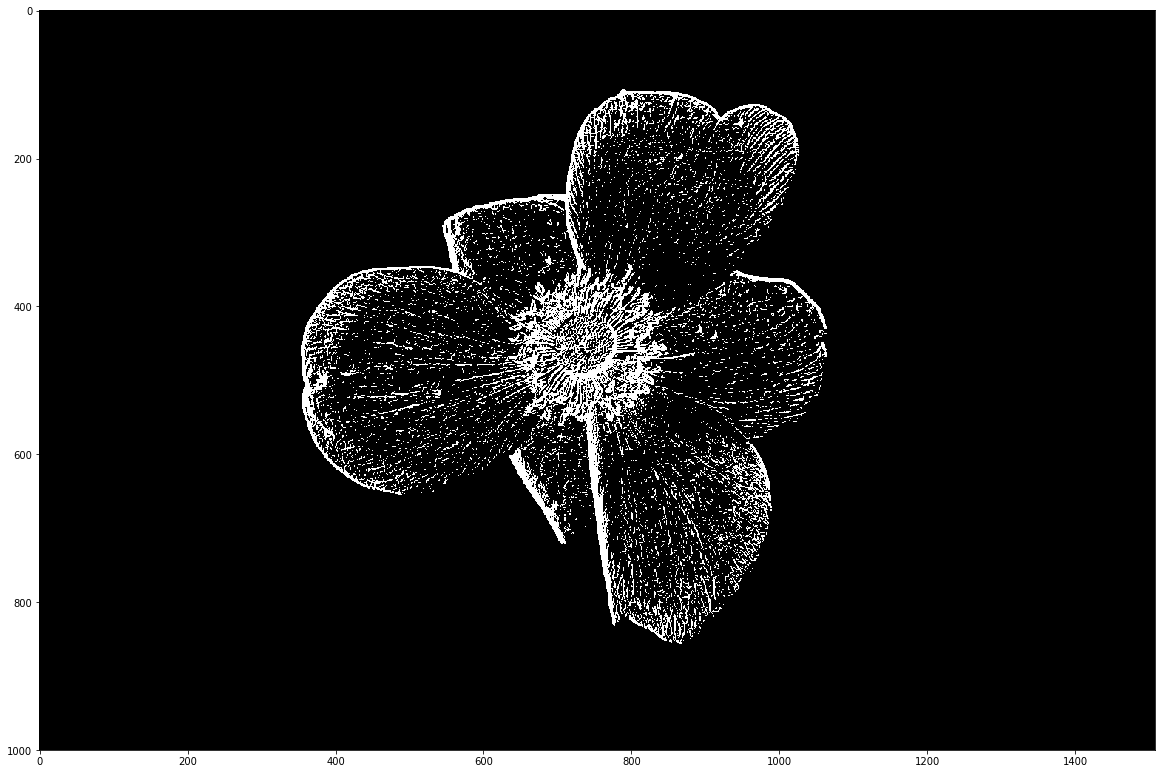

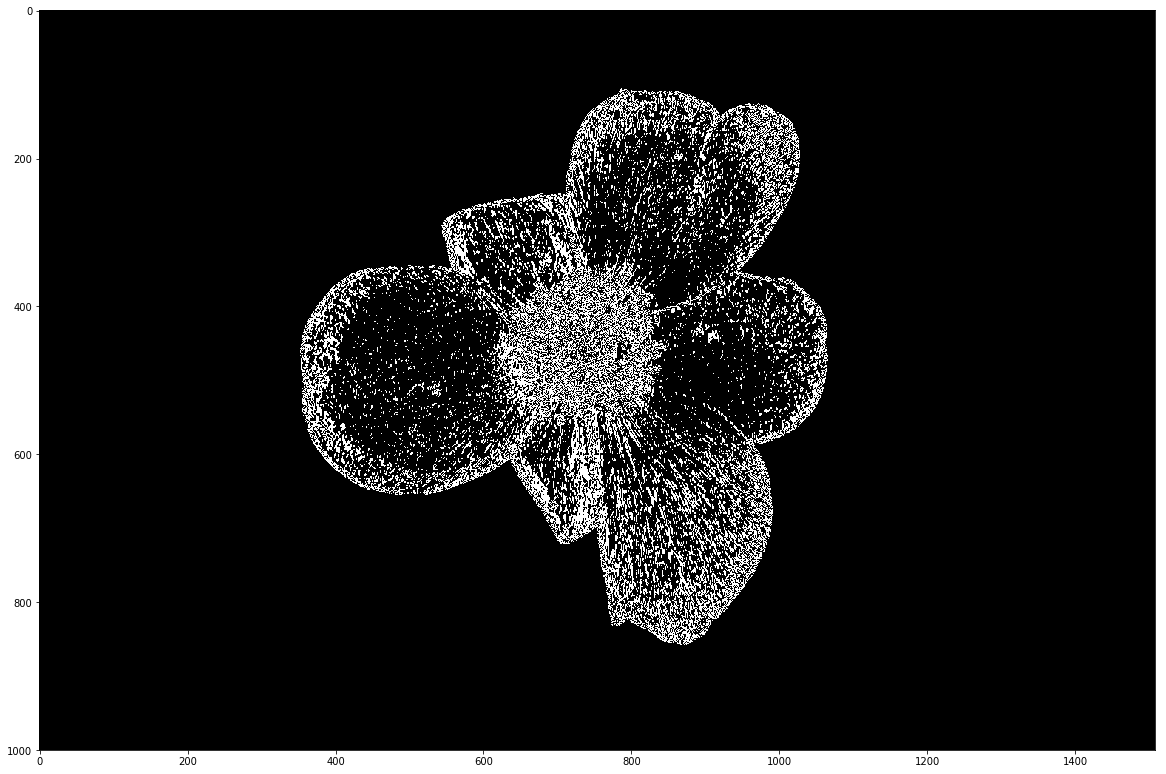

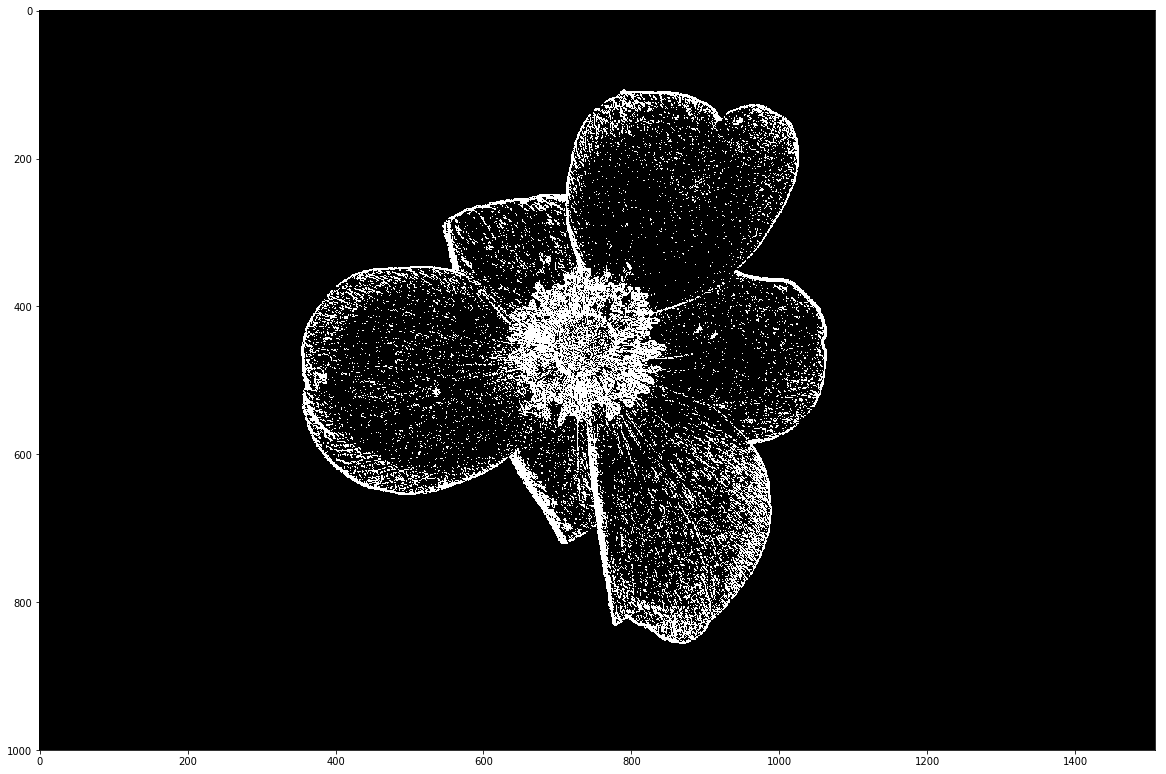

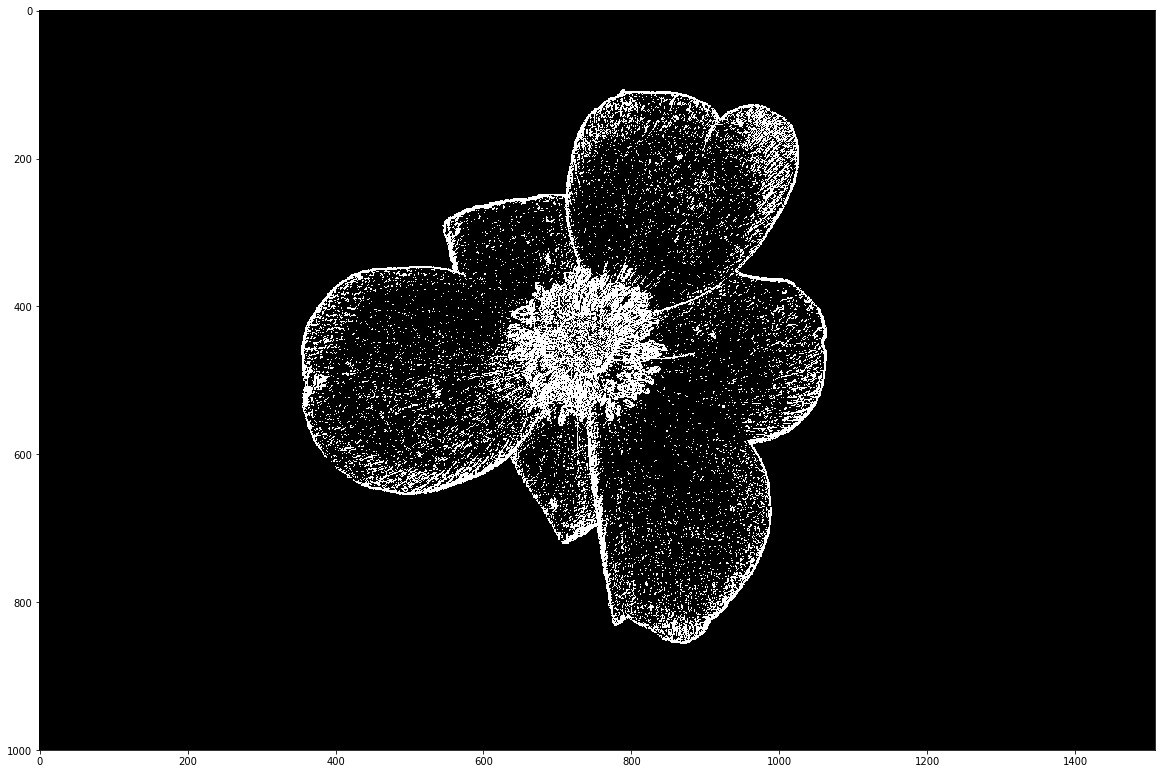

In [50]:
img = cv2.imread(foreground + '104.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# img_gray = img[:,:,2]
# kernel1 = np.ones((3,3),np.float32)/9
# dst = cv2.filter2D(img_gray,-1,kernel)

# _, img_gray = cv2.threshold(img_gray, 1, 255, cv2.THRESH_BINARY)
# _, dst = cv2.threshold(dst, 1, 255, cv2.THRESH_BINARY)


# kernel2 = np.ones((5,5),np.uint8)
# img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel2)
# dst = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel2)

# xor = cv2.bitwise_xor(img_gray, dst)
# show(xor)

### thre = int(img_gray.max() / 11)

laplacian = cv2.Laplacian(img_gray,cv2.CV_64F,ksize=3)
laplacian = np.absolute(laplacian)
laplacian_8u = np.uint8(laplacian)
sobelx64f = cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

# laplacian = cv2.Laplacian(laplacian,cv2.CV_64F)
# plt.imshow(laplacian, cmap = 'gray'), plt.show()
# _, dst = cv2.threshold(laplacian_8u, 8, 255, cv2.THRESH_BINARY)
# dst = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)
kernel = np.ones((3,3),np.float32)
kernel3 = np.ones((3,3),np.float32)/9
kernel5 = np.ones((5,5),np.float32)/25
kernel7 = np.ones((7,7),np.float32)/49
row = np.array([-1, 0, 1])
prewitt = np.vstack((row, row, row))
column = row.reshape(3,-1)
prewitt2 = np.hstack((column, column, column))

myf = np.array([[0,-1,-1], [1,0,-1], [1,1,0]])
myf2 = np.array([[-1,-1,0], [-1,0,1], [0,1,1]])


p = cv2.filter2D(img_gray,-1,prewitt)
p2 = cv2.filter2D(img_gray,-1,prewitt2)

m = cv2.filter2D(img_gray,6,myf) # 6 >> 64F
abs_m64f = np.absolute(m)
m_8u = np.uint8(abs_m64f)

m2 = cv2.filter2D(img_gray,6,myf2) # 6 >> 64F
abs_m264f = np.absolute(m2)
m2_8u = np.uint8(abs_m264f)

# dst = cv2.filter2D(laplacian,-1,kernel7)
# _, dst = cv2.threshold(laplacian, 32, 255, cv2.THRESH_BINARY)
dst = cv2.filter2D(laplacian,-1,kernel5)
_, dst = cv2.threshold(laplacian, 14, 255, cv2.THRESH_BINARY)
print(p2.min())
_, p = cv2.threshold(p, 8, 255, cv2.THRESH_BINARY)
_, p2 = cv2.threshold(p2, 8, 255, cv2.THRESH_BINARY)
_, s = cv2.threshold(sobel_8u, 100, 255, cv2.THRESH_BINARY)
_, m = cv2.threshold(m_8u, 8, 255, cv2.THRESH_BINARY)
_, m2 = cv2.threshold(m2_8u, 8, 255, cv2.THRESH_BINARY)
show(dst)
# dst = cv2.filter2D(laplacian,-1,kernel3)
# _, dst = cv2.threshold(laplacian, 44, 255, cv2.THRESH_BINARY)
# show(dst)
# dst = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel)
# show(dst)
# dst = Zhang_Suen_thinning(dst)

or_ = cv2.bitwise_or(p, p2)

show(p)
show(p2)
show(or_)
show(s)
show(m)
show(m2)

In [44]:
prewitt
column
[[-1,-1,0], [1-,0,1], [0,1,1]]

SyntaxError: invalid syntax (<ipython-input-44-c60e9f4ef1e0>, line 3)

In [7]:
#高さを定義
height = img.shape[0]                         
#幅を定義
width = img.shape[1]  
#回転の中心を指定                          
center = (int(width/2), int(height/2))
#回転角を指定
angle = 45.0
#スケールを指定
scale = 1.0
#getRotationMatrix2D関数を使用
trans = cv2.getRotationMatrix2D(center, angle , scale)
#アフィン変換
img2 = cv2.warpAffine(img, trans, (width,height))

In [73]:
resized_img = cv2.resize(dst, dsize=(400, 300))

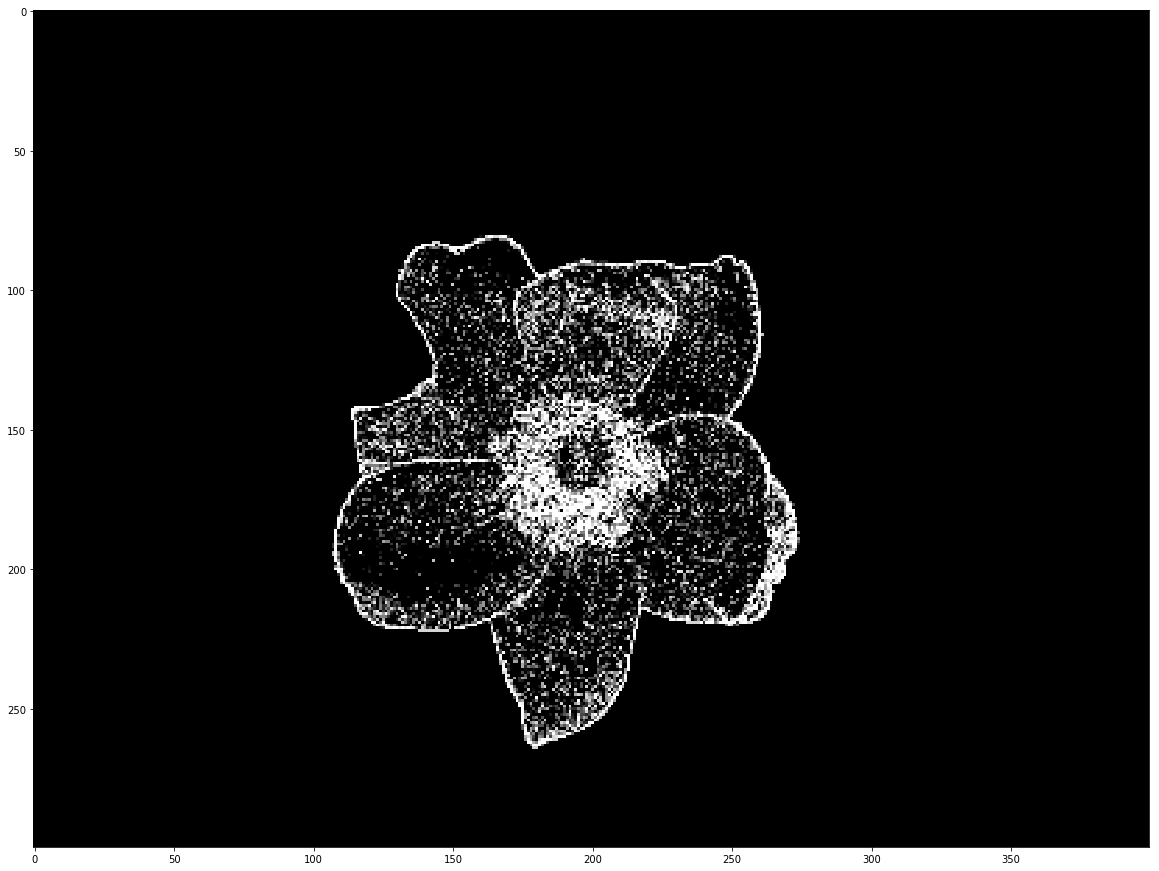

In [74]:
show(resized_img)